# Team Members

Jacob Bodera, Caleb Ng, Russell Chow, Sammi Jiang, Brianna Le

# Assignment 1

1. The assignment is done and submitted as groups.
2. One representative will upload the submission on Dropbox.
3. Make sure you installed all packages that are imported in the file before you run the codes.
4. Cheating is not allowed!

In this data project, we will focus on exploratory data analysis of obesity levels.

Let's first load all libraries or packages needed:

In [56]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

## Read the Data

>__Task 1__
>
>- Import the data file "obesity_level.csv"
>- Check metadata using `info()`

In [57]:
obs_df = pd.read_csv("obesity_level.csv")
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            2120 non-null   int64  
 1   month                           2120 non-null   int64  
 2   day                             2120 non-null   int64  
 3   gender                          2111 non-null   object 
 4   age                             2120 non-null   float64
 5   height                          2111 non-null   float64
 6   weight                          2111 non-null   float64
 7   family_history_with_overweight  2111 non-null   object 
 8   FAVC                            2111 non-null   object 
 9   FCVC                            2111 non-null   float64
 10  NCP                             2111 non-null   float64
 11  CAEC                            2111 non-null   object 
 12  SMOKE                           21

>__Task 2__
>
>Check the top 10 rows of the obesity data frame

In [58]:
obs_df.head(10)

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2015,9,22,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2015,10,19,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2015,1,19,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,2015,11,17,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,2015,2,24,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,2015,5,4,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,2016,2,22,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,2016,8,14,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,2015,4,13,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,2016,5,20,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Do you know which columns contain date information? The first three columns (i.e., __year__, __month__, __day__) are integers, shown as `int64` from the metadata above.

>__Task 3__
>
>- Combine and convert these three columns to `date` column, which contains `datetime` type
>- Confirm the result by printing its data type

It looks the date is not read as date

In [59]:
obs_df['date'] = pd.to_datetime(obs_df[['day', 'month', 'year']])

# Call the column to see results
obs_df['date']

0      2015-09-22
1      2015-10-19
2      2015-01-19
3      2015-11-17
4      2015-02-24
          ...    
2115   2015-06-26
2116   2015-07-22
2117   2016-05-04
2118   2015-12-02
2119   2015-01-25
Name: date, Length: 2120, dtype: datetime64[ns]

In [60]:
# Print data type
print(obs_df['date'].dtype)

datetime64[ns]


Now, let's look at the last column __NObeyesdad__, which has the obesity levels.

>__Task 4__
>
> Find the unique entries in __NObeyesdad__ column.


In [61]:
obs_df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', nan], dtype=object)

## Data Cleansing

>__Task 5__
>
>- Print the min and max date in the dataset

In [62]:
display(f'Min date: {obs_df['date'].min()}')
display(f'Max date: {obs_df['date'].max()}')

'Min date: 2015-01-01 00:00:00'

'Max date: 2016-12-27 00:00:00'

Now, we want to find out if there's any missing values in the data.

>__Task 6__
>
>- Find the number of missing values in each column
>- Retrieve rows with missing values

In [63]:
# Find the number of missing values in columns
obs_df.isna().sum()

year                              0
month                             0
day                               0
gender                            9
age                               0
height                            9
weight                            9
family_history_with_overweight    9
FAVC                              9
FCVC                              9
NCP                               9
CAEC                              9
SMOKE                             9
CH2O                              9
SCC                               9
FAF                               9
TUE                               9
CALC                              9
MTRANS                            9
NObeyesdad                        9
date                              0
dtype: int64

In [64]:
# Retrieve missing values in rows
obs_df.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
2115    16
2116    16
2117    16
2118    16
2119    16
Length: 2120, dtype: int64

Looks like some records only contain age data on file and have missing values in all the other essential columns.

> __Task 7__
>
> Handle missing values. What is your suggestion? Removing all rows with NA or removing the column if it has NA? One is the correct answer.

In [65]:
display(f'Number of rows with at least 16 NAs: {(obs_df.isna().sum(axis=1) >= 16).sum()}')
display(f'Number of rows with at least 1 NA: {(obs_df.isna().sum(axis=1) > 0).sum()}')
display(f'Number of rows in data set: {obs_df.shape[0]}')

'''
There are only 9 rows which contain any NA values, and with 2120 rows, removing these doesn't make a large different.
Removing the columns would essentially remove all features from the data - very bad
'''

obs_df.dropna(axis=0, how="any", inplace=True)
display(f'Shape after dropping NA rows: {obs_df.shape}')

'Number of rows with at least 16 NAs: 9'

'Number of rows with at least 1 NA: 9'

'Number of rows in data set: 2120'

'Shape after dropping NA rows: (2111, 21)'

In [66]:
# Find the number of missing variables again
display(f'Number of columns with any NAs: {obs_df.isna().sum().sum()}')
display(f'Number of rows with any NAs: {obs_df.isna().sum(axis=1).sum()}')

'Number of columns with any NAs: 0'

'Number of rows with any NAs: 0'

Also, we want to find out if there's any duplicated values. Note that this data set does not have an id column. So, we need to be cautious and infer duplicates by including ALL the values (not just a few columns).

>__Task 8__
>
>Check if there is any duplicates in the data set. Do you need to remove duplicates?

In [67]:
'''
There are no duplicated rows. Even if there were a few duplicated rows, this would not be too improbable for 
two people to have the same health data and would not cause much bias in the data
'''
obs_df.duplicated().sum()

0

## Data Analysis and Preprocessing

Let's explore the data more. Most of the columns in the data set describe the attributes of eating habits and physical conditions, i.e., __FAVC__, __FCVC__, __NCP__, __CAEC__, __SMOKE__, __CH2O__, __SCC__, __FAF__, __TUE__, __CALC__, __MTRANS__. We will dive into a few attributes.

>__Task 9__
>
>- Check the min, max, and average values of the __age__ column
>- Find out how many data points are in each gender group

In [68]:
# Check values
display(f'Age min: {obs_df['age'].min()}')
display(f'Age max: {obs_df['age'].max()}')
display(f'Age mean: {obs_df['age'].mean()}')

'Age min: 14.0'

'Age max: 61.0'

'Age mean: 24.312599908574136'

In [69]:
# Count values
display(f'{(obs_df["gender"] == "Female").sum()} female data points')
display(f'{(obs_df["gender"] == "Male").sum()} male data points')

'1043 female data points'

'1068 male data points'

>__Task 10__
>
>- Find out what are the values and the corresponding counts in the __NObeyesdad__ column. Is it a ordinal or nominal variable?
>   - You can count the values in the column
>   - It seems like there is an order between different levels of obesity, ain't it?
>- Depending on which is the correct variable type (nominal or ordinal) convert the `NObesity_encoded` column to numeric using an encoder or map function.

In [70]:
# Count values
'''
The "NObeyesdad" column is ordinal because there is an inherent order to the unique weight values.
Insufficient -> Normal -> Overweight -> Obese
'''
obs_df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [71]:
nobeyesdad_dict = {
    "Insufficient_Weight": -1,
    "Normal_Weight": 0,
    "Overweight_Level_II": 1,
    "Overweight_Level_I": 2,
    "Obesity_Type_III": 3,
    "Obesity_Type_II": 4,
    "Obesity_Type_I": 5,
}

obs_df["NObesity_encoded"] = obs_df["NObeyesdad"].map(nobeyesdad_dict)

>__Task 11__
>
>- Check the values of __CAEC__ (consumption of food between meals) and __CALC__ (consumption of alcohol). Do they have same categorical values?
>- Convert each of the two variables to numeric: `CAEC_encoded` and `CALC_encoded`. Pay attention to the ordinal or nominal type.

In [72]:
# Check the values of CAEC
obs_df["CAEC"].value_counts().sort_index(ascending=False)

CAEC
no              51
Sometimes     1765
Frequently     242
Always          53
Name: count, dtype: int64

In [73]:
# Check the values of CALC 
obs_df["CALC"].value_counts().sort_index(ascending=False)

CALC
no             639
Sometimes     1401
Frequently      70
Always           1
Name: count, dtype: int64

In [74]:
'''
CAEC and CALC have the same values and describe the frequency of each of these actions occuring. These are ordinal value because they
do have an order to them: no -> sometimes -> frequently -> always
'''
frequency_dict = {
    "no": 0,
    "Sometimes": 1,
    "Frequently": 2,
    "Always": 3
}

obs_df["CAEC_encoded"] = obs_df["CAEC"].map(frequency_dict)
obs_df["CALC_encoded"] = obs_df["CALC"].map(frequency_dict)

In [75]:
# Check whether the encoding works
print(obs_df['CAEC_encoded'].value_counts().sort_index())
print(obs_df['CALC_encoded'].value_counts().sort_index())

CAEC_encoded
0      51
1    1765
2     242
3      53
Name: count, dtype: int64
CALC_encoded
0     639
1    1401
2      70
3       1
Name: count, dtype: int64


>__Task 12__
>
>- Check the values of transportation used (__MTRANS__ column). It is nominal variable.
>- Convert it to numeric using one-hot encoding and use the value as the new column names, e.g., `Automobile` and `Bike`. Hint: you can use either `get_dummies` from pandas or `OneHotEncoder` from sklearn. The latter will require some extra steps to merge back to the original dataset.

In [76]:
# Check the values
print(obs_df['MTRANS'].value_counts().sort_index())

MTRANS
Automobile                457
Bike                        7
Motorbike                  11
Public_Transportation    1580
Walking                    56
Name: count, dtype: int64


In [77]:
ohe = OneHotEncoder(sparse_output=False)
mtrans_encoded = ohe.fit_transform(obs_df[["MTRANS"]])
cols = ["Automobile", "Bike", "Motorbike", "Public_Transportation", "Walking"]

df = pd.DataFrame(mtrans_encoded, columns=cols)
obs_df = obs_df.join(df)

There are several binary variables in the dataset: __family_history_with_overweight__, __FAVC__ (frequency of consumption of vegetables), __SMOKE__, __SCC__ (calories consumption monitoring). Let's transform these variables.

>__Task 13__
>
>- Check the values of __family_history_with_overweight__, __FAVC__, __SMOKE__, __SCC__ 
>- Convert them to numeric with 1 for `yes` and 0 for `no`. The new columns are names with suffix `_encoded`, e.g., `family_history_with_overweight_encoded`.

In [78]:
cols = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
# Check the values
for col in cols:
    display(obs_df[col].value_counts().sort_index())


family_history_with_overweight
no      385
yes    1726
Name: count, dtype: int64

FAVC
no      245
yes    1866
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

In [79]:
# Convert to numeric
binary_encoding_map = {'yes':1, 'no':0}
for col in cols:
    obs_df[col + "_encoded"] = obs_df[col].map(binary_encoding_map)
    display(obs_df[col + "_encoded"].value_counts().sort_index())

family_history_with_overweight_encoded
0     385
1    1726
Name: count, dtype: int64

FAVC_encoded
0     245
1    1866
Name: count, dtype: int64

SMOKE_encoded
0    2067
1      44
Name: count, dtype: int64

SCC_encoded
0    2015
1      96
Name: count, dtype: int64

You can run the following `for` loop to check the results:

>__Task 14__
>
>Retrieve rows where values are outliers in the __weight__ column
>
>- Calculate mean, 3 std above the mean and 3 std below the mean 
>- Create a filter (a boolean vector) that returns true if values are less than `mean-3*sd` or greater than `mean+3*sd`
>- Use this filter to retrieve the outliers

In [80]:
# Find the upper bound, mean, and lower bound
weight = obs_df["weight"]
mean   = weight.mean()
sd     = weight.std()

lower_bound = mean - 3*sd
upper_bound = mean + 3*sd

print(lower_bound, mean, upper_bound)

8.012542890866285 86.58605812648035 165.15957336209442


In [81]:
# Create a filter and retrieve the outliers
weight_outliers = obs_df[(obs_df["weight"] < lower_bound) | (obs_df["weight"] > upper_bound)]
weight_outliers

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,CALC_encoded,Automobile,Bike,Motorbike,Public_Transportation,Walking,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
344,2016,1,5,Male,18.0,1.87,173.0,yes,yes,3.0,...,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0


You can use the same method to find out outliers in the other columns. But there's a easier way to find out all in once using the `for` loop:

In [82]:
outlier_cols = ["age", "height", "weight"]
for col in outlier_cols:
    lower = obs_df[col].mean() - 3*obs_df[col].std()
    upper = obs_df[col].mean() + 3*obs_df[col].std()

    col_outlier = obs_df[(obs_df[col] < lower) | (obs_df[col] > upper)]
    display(f'{col} outlier(s):')
    display(col_outlier)
    

'age outlier(s):'

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,CALC_encoded,Automobile,Bike,Motorbike,Public_Transportation,Walking,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
21,2015,12,10,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,...,0,1.0,0.0,0.0,0.0,0.0,1,1,1,0
92,2015,7,14,Male,55.000000,1.780000,84.000000,yes,no,3.000000,...,2,0.0,0.0,0.0,0.0,1.0,1,0,0,1
133,2015,6,13,Female,61.000000,1.650000,66.000000,no,yes,3.000000,...,2,0.0,0.0,0.0,1.0,0.0,0,1,0,0
137,2016,4,20,Male,44.000000,1.600000,80.000000,yes,no,2.000000,...,0,0.0,0.0,1.0,0.0,0.0,1,0,1,0
161,2016,10,23,Male,55.000000,1.650000,80.000000,no,yes,2.000000,...,0,1.0,0.0,0.0,0.0,0.0,0,1,0,0
169,2015,12,22,Female,45.000000,1.630000,77.000000,yes,yes,2.000000,...,0,1.0,0.0,0.0,0.0,0.0,1,1,0,0
232,2015,1,25,Female,51.000000,1.590000,50.000000,yes,no,3.000000,...,0,0.0,0.0,0.0,1.0,0.0,1,0,1,1
252,2016,2,6,Male,56.000000,1.790000,90.000000,yes,no,2.000000,...,2,1.0,0.0,0.0,0.0,0.0,1,0,1,0
492,2016,3,24,Male,45.000000,1.700000,86.000000,no,yes,3.000000,...,0,1.0,0.0,0.0,0.0,0.0,0,1,0,0
1013,2016,2,6,Male,55.246250,1.769269,80.491339,no,yes,2.000000,...,0,1.0,0.0,0.0,0.0,0.0,0,1,0,0


'height outlier(s):'

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,CALC_encoded,Automobile,Bike,Motorbike,Public_Transportation,Walking,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded


'weight outlier(s):'

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,CALC_encoded,Automobile,Bike,Motorbike,Public_Transportation,Walking,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
344,2016,1,5,Male,18.0,1.87,173.0,yes,yes,3.0,...,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0


>__Task 15__
>
>Split the data set into 80% train set and 20% test set
>
>- The target variable is __NObesity_encoded__
>- The feature columns are __age__, __height__, __weight__, __FCVC__, __NCP__, __CH2O__, __CAEC_encoded__, __CALC_encoded__, __Automobile__, __Bike__, __Motorbike__, __Public_Transportation__, __Walking__, __family_history_with_overweight_encoded__, __FAVC_encoded__, __SMOKE_encoded__, __SCC_encoded__
>
>Remember our target variable has multiple categories? Do you need to consider stratified splitting?

In [83]:
from sklearn.model_selection import train_test_split
target_var = 'NObesity_encoded'
feature_var = ['age', 'height', 'weight', 'FCVC', 'NCP', 'CH2O', 'CAEC_encoded', 'CALC_encoded',
               'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
               'family_history_with_overweight_encoded', 'FAVC_encoded', 'SMOKE_encoded', 'SCC_encoded']

X = obs_df[feature_var]
y = obs_df[target_var]

'''
It is important to stratify this data based on the target variable because we want the training data to include all of the 
possible categories of NObesity_encoded - ex isn't all trained on normal weight people
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

display(f'X train shape {X_train.shape}')
display(f'y train shape {y_train.shape}')
display(f'X test shape {X_test.shape}')
display(f'y test shape {y_test.shape}')

'X train shape (1688, 17)'

'y train shape (1688,)'

'X test shape (423, 17)'

'y test shape (423,)'

In [84]:
# Check the target var distribution in train set vs test set
print(y_train.value_counts(), y_test.value_counts())

NObesity_encoded
 5    281
 3    259
 4    237
 2    232
 1    232
 0    229
-1    218
Name: count, dtype: int64 NObesity_encoded
 5    70
 3    65
 4    60
 1    58
 2    58
 0    58
-1    54
Name: count, dtype: int64


>__Task 16__
>
>- Apply `MinMaxScaler` to scale columns __age__, __height__, __weight__, __FCVC__, __NCP__, __CH2O__ between 0 and 1. Do you need to scale the encoded categorical variables?
>- Implement the scaler to both train and test sets from the above task. Hint: you can assign the scaled value to `X_train[cols]` and `X_test[cols]`.

In [85]:
X_train.head()

,age,height,weight,FCVC,NCP,CH2O,CAEC_encoded,CALC_encoded,Automobile,Bike,Motorbike,Public_Transportation,Walking,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
1837,20.941943,1.812963,138.730619,3.000000,3.00000,2.641489,1,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0
110,21.000000,1.750000,75.000000,3.000000,3.00000,2.000000,1,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0
857,28.825223,1.765874,82.045045,1.064162,3.98955,2.028426,1,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0
202,26.000000,1.560000,102.000000,3.000000,3.00000,1.000000,1,1,0.0,0.0,0.0,1.0,0.0,1,1,1,0
319,27.000000,1.550000,63.000000,2.000000,3.00000,1.000000,1,1,1.0,0.0,0.0,0.0,0.0,0,1,0,0


In [86]:
# Note that the scaler will need to fit to train set
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['age', 'height', 'weight', 'FCVC', 'NCP', 'CH2O']

min_max = MinMaxScaler()

# Transform both train and test sets
X_train[scale_cols] = min_max.fit_transform(X_train[scale_cols])
X_test[scale_cols]  = min_max.transform(X_test[scale_cols])

display("X train", X_train.head())
display("X test", X_test.head())

'X train'

,age,height,weight,FCVC,NCP,CH2O,CAEC_encoded,CALC_encoded,Automobile,Bike,Motorbike,Public_Transportation,Walking,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
1837,0.147701,0.684836,0.744258,1.000000,0.666667,0.820744,1,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0
110,0.148936,0.566038,0.268657,1.000000,0.666667,0.500000,1,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0
857,0.315430,0.595989,0.321232,0.032081,0.996517,0.514213,1,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0
202,0.255319,0.207547,0.470149,1.000000,0.666667,0.000000,1,1,0.0,0.0,0.0,1.0,0.0,1,1,1,0
319,0.276596,0.188679,0.179104,0.500000,0.666667,0.000000,1,1,1.0,0.0,0.0,0.0,0.0,0,1,0,0


'X test'

,age,height,weight,FCVC,NCP,CH2O,CAEC_encoded,CALC_encoded,Automobile,Bike,Motorbike,Public_Transportation,Walking,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
1119,0.456518,0.380777,0.301776,0.578032,0.636372,0.110641,1,0,1.0,0.0,0.0,0.0,0.0,1,1,0,0
1779,0.230328,0.289625,0.462972,0.998093,0.044681,0.135083,1,0,0.0,0.0,0.0,1.0,0.0,1,1,0,0
1445,0.142066,0.625002,0.477246,0.500000,0.666667,0.309095,1,0,0.0,0.0,0.0,1.0,0.0,1,1,0,0
2004,0.255319,0.347066,0.544259,1.000000,0.666667,0.841402,1,1,0.0,0.0,0.0,1.0,0.0,1,1,0,0
1234,0.559953,0.634562,0.443637,0.500000,0.666667,0.840146,1,1,1.0,0.0,0.0,0.0,0.0,1,1,0,0


# Regression 

In [87]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize , poly)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [88]:
## Load Boston Data
boston = load_data("Boston") 
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

According to the [Kaggle page](https://www.kaggle.com/datasets/avish5787/boston-data-set), below you can find the details:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - \% lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

>__Task 17__
>
> Give a first look at your data. Print how many row/columns in the data, print the first 5 rows and use .info to learn more about it.

In [89]:
# row/column counts
display(f'# rows: {boston.shape[0]}')
display(f'# cols: {boston.shape[1]}')

'# rows: 506'

'# cols: 13'

In [90]:
# first 5 row
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [91]:
# info
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


>__Task 18__
>
> Using seaborn package, plot the scatterplot of the data. On map `lstat` on x axis and `medv` on y axis. Use `hue` option to map `indus` to colour and `style` option to map `chas` to style 

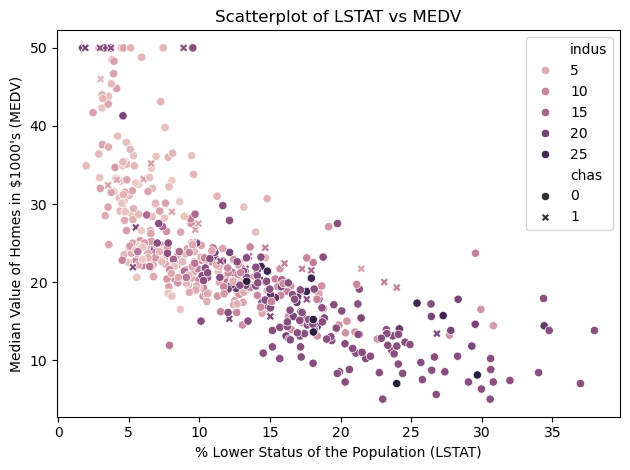

In [92]:
sns.scatterplot(
    data = boston,
    x = "lstat",
    y = "medv",
    hue = "indus",
    style = "chas",
)

plt.title("Scatterplot of LSTAT vs MEDV")
plt.xlabel("% Lower Status of the Population (LSTAT)")
plt.ylabel("Median Value of Homes in $1000's (MEDV)")

plt.tight_layout()
plt.show()

It looks there is negative correlation between the median value of houses \% of lower status of the population. Also as colours suggest, as the proportion of industrial residences increase price reduces.

>__Task 19__
>
> - Apply train test split to the data. Use 'medv' as output (y) values and everything else as input variables.
> - The test size must be 20% of the data.
> - Set randomm state to 156.

In [93]:
from sklearn.model_selection import train_test_split

y = boston['medv']
X = boston.drop(['medv'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

display(f'X train shape {X_train.shape}')
display(f'y train shape {y_train.shape}')
display(f'X test shape {X_test.shape}')
display(f'y test shape {y_test.shape}')

'X train shape (404, 12)'

'y train shape (404,)'

'X test shape (102, 12)'

'y test shape (102,)'

### Fit Linear Model

Below code fits a simple linear regression to model the relationship between `lstat` and `medv` and plots the model.
- First we initiate the model
- Then fit the model on train set
- And finally calculate the test set (MAE and MSE) performance

In [94]:
from sklearn.linear_model import LinearRegression
# Initiate the model
lm = LinearRegression()

# Fit 
lm = lm.fit(X_train[['lstat']], y_train)

The estimated coefficients are

In [95]:
print(lm.intercept_)
print(lm.coef_)

34.517017608995346
[-0.93555899]


Now, lets plot the model

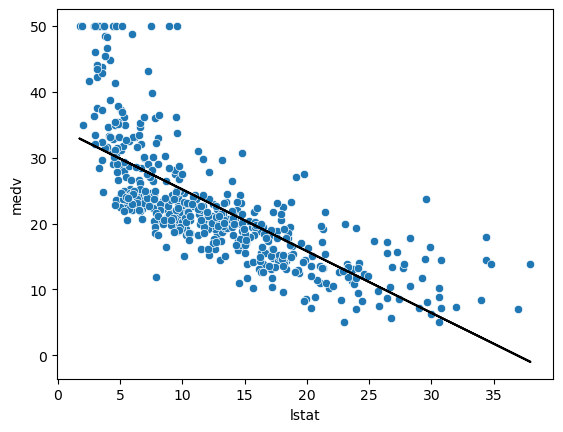

In [96]:
# Plot the scatterplot
sns.scatterplot(data=boston, x="lstat", y="medv")

# Add predictions
preds = lm.predict(X[['lstat']])

plt.plot(X[['lstat']],preds,c='black')
plt.show()

In [97]:
from sklearn import metrics 

# Calculate the predictions on test set
preds = lm.predict(X_test[['lstat']])

print('MAE (test): ',metrics.mean_absolute_error(y_test,preds))
print('MSE (test): ',metrics.mean_squared_error(y_test,preds))

MAE (test):  4.0284465458996985
MSE (test):  32.112016040730275


>__Task 20__
>
> - Fit a multi-linear regression. Use `['lstat','rm', 'nox']` as independent (input) variables and `medv` as dependent (output)
> - Fit the model on train set
> - Print the model coefficients
> - Calculate the predictions on test set
> - Print the test set MAE and MSE.
> - Does the mean absolute and mean squarred errors reduce?

In [98]:
# Initiate and fit a Linear Regression model
lm_multi = LinearRegression()

inputs = ['lstat', 'rm', 'nox']
lm_multi.fit(X_train[inputs], y_train)

# Predict on test set
preds_multi = lm_multi.predict(X_test[inputs])

# Calculate performance
print('MAE (test): ', metrics.mean_absolute_error(y_test,preds_multi))
print('MSE (test): ', metrics.mean_squared_error(y_test,preds_multi))

MAE (test):  3.6461922548779206
MSE (test):  23.608132106949178


### Polynomial regression

Polynomian regressions are nonlinear models that are trained using the same way that linear models are trained. Only difference is, instead of just inputting the features (independent variables) themselves, we also calculate their powers (square, cube, 4th degree etc) and input the model.

Let's train a 4th-degree polynomial regression using only `lstat` as input. 

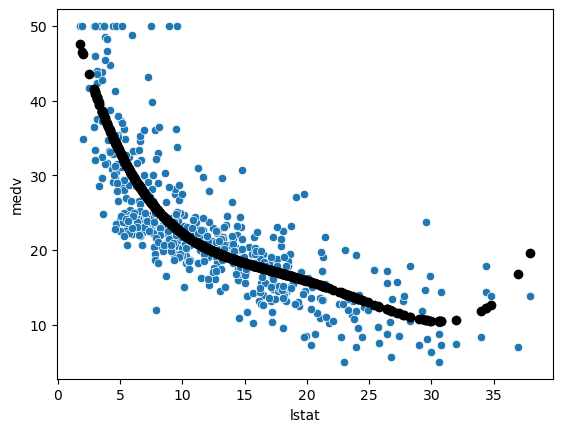

In [99]:
from sklearn.preprocessing import PolynomialFeatures

poly    = PolynomialFeatures (degree=4, include_bias=False)
x_trn   = poly.fit_transform(X_train['lstat'].to_numpy().reshape(-1,1))

lm = LinearRegression()
lm = lm.fit(x_trn, y_train)

x     = poly.transform(X['lstat'].to_numpy().reshape(-1,1))
preds = lm.predict(x)

# Plot the scatterplot
sns.scatterplot(data=boston, x="lstat", y="medv")

# Add predictions
plt.scatter(X[['lstat']],preds,c='black')
plt.show()

As seen above the predictions are not linear but can be 4th degree polynomial function

### Overfitting

>__Task 21__
>
> - Complete the below code that fits polynomial regression with degree = 1,2,...,12 iteratively on train set and calculate the test set performance. Remember that in Python range(a,b) generates the series [a,a+1,...,b-1].
> - The test MSE calculations are collected in a list, `MSEs`
> - Plot the MSE against the degree of the polynomial regression.
> - Which polynomial degree minimizes the test loss?


In [100]:
from sklearn.preprocessing import PolynomialFeatures

MSEs = []
# Fit model and collect performance iteratively
for i in range(1, 13):
    # Fit a Linear Regression model
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_trn = poly.fit_transform(X_train['lstat'].to_numpy().reshape(-1,1))
    
    lm = LinearRegression()
    lm = lm.fit(x_trn, y_train)
    
    # Predict on test set
    x = poly.transform(X_test['lstat'].to_numpy().reshape(-1,1))
    preds = lm.predict(x)
    
    # Calculate performance
    mse = metrics.mean_squared_error(y_test,preds)
    MSEs.append(mse)
    print('MSE (test): ', mse)
    

MSE (test):  32.112016040730275
MSE (test):  28.427942440252203
MSE (test):  27.05706529861536
MSE (test):  26.704807249936245
MSE (test):  26.0634194143409
MSE (test):  26.30923542477949
MSE (test):  26.300433328971625
MSE (test):  27.18519595743746
MSE (test):  26.869796096255122
MSE (test):  27.29531373658939
MSE (test):  27.592185917328873
MSE (test):  31.08541469327315


Plot the MSE against the degree of the polynomial regression

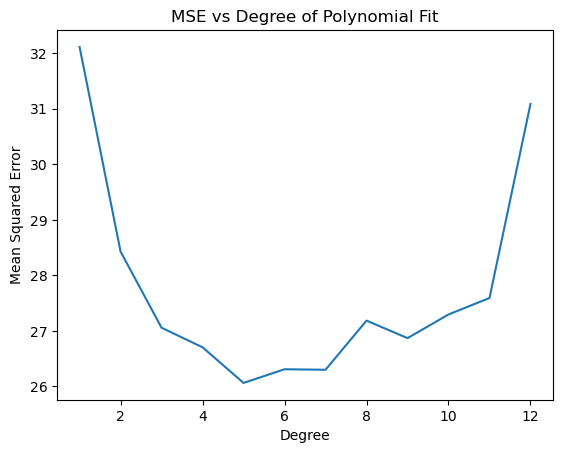

In [101]:
plt.plot(range(1, 13), MSEs)
plt.title("MSE vs Degree of Polynomial Fit")
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.show()